In [2]:
import pandas as pd
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
import api_utils
import app_utils

In [2]:
# POST A LOG FILE 
# r = analysis_utils.post_log('-', '../../MBOT-RPI/data/convex_10mx10m_5cm.log')
# r

In [3]:
df = api_utils.get_table('prod')
df.head()
df.describe()

,BOT NAME,PICKLE NAME,PICKLE PATH,LOG NAME,LOG PATH,DESCRIPTION,DATE,DATETIME
count,52,52,52,52,52,52,52,52
unique,3,52,52,52,52,50,52,52
top,MICHAEL,2020_10_15_21:51:40.pkl,/home/michaellevy/data/prod/mbot/pickle/2020_1...,2020_10_13_00:47:02.log,/home/michaellevy/data/prod/mbot/log/2020_10_1...,A-STAR PATH INVESTIGATION,2020-10-12-00:16:52,2020-10-24 13:32:58.920797-04:00
freq,37,1,1,1,1,2,1,1


In [10]:
# get df from runId
runId = 53

df = api_utils.get_df(runId)

In [11]:
df.keys()

dict_keys(['ODOMETRY', 'MBOT_MOTOR_COMMAND', 'SLAM_POSE', 'CONTROLLER_PATH'])

In [12]:
path = pd.DataFrame(df['CONTROLLER_PATH']['path'][0])
path



,timestamp,utime,x,y,theta
0,29019979,2077147701,0.000000e+00,0.000000e+00,0.000000
1,29019979,-5548477034755269912,7.450581e-08,7.450581e-08,0.000000
2,29019979,-5548477034755269912,5.000008e-02,7.450581e-08,0.000000
3,29019979,-5548477034755269912,1.000001e-01,7.450581e-08,0.000000
4,29019979,-5548477034755269912,1.500001e-01,7.450581e-08,0.000000
5,29019979,-5548477034755269912,2.000001e-01,7.450581e-08,0.000000
6,29019979,-5548477034755269912,2.500001e-01,7.450581e-08,0.000000
7,29019979,-5548477034755269912,3.000001e-01,7.450581e-08,0.000000
8,29019979,-5548477034755269912,3.500001e-01,7.450581e-08,0.000000
9,29019979,-5548477034755269912,4.000001e-01,7.450581e-08,0.000000


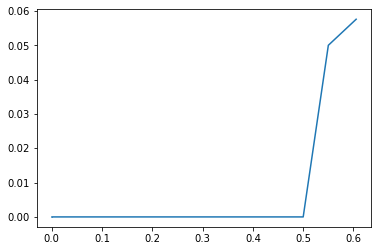

In [13]:
plt.plot(path.x[0:], path.y[0:])
plt.show()

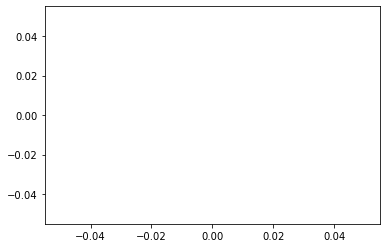

In [74]:
plt.plot(path.x[44:], path.y[44:])
plt.show()

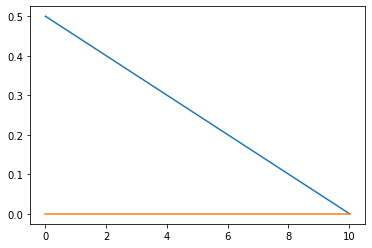

[0.5, 0.0]

In [8]:
channel = 'MBOT_MOTOR_COMMAND'
time = app_utils.shift(df[channel]['timestamp'], time=True)

plt.plot(time, df[channel]['trans_v'])
plt.plot(time, app_utils.shift(df[channel]['angular_v']))
plt.show()


In [6]:
df_lookup = app_utils.get_lookup(df)
df_lookup

,SLAM_MAP,LIDAR,ODOMETRY,SLAM_POSE,MBOT_MOTOR_COMMAND,SLAM_PARTICLES,CONTROLLER_PATH,MSG_CONFIRM,MBOT_TIMESYNC
0,timestamp,timestamp,timestamp,timestamp,timestamp,timestamp,timestamp,timestamp,timestamp
1,utime,utime,utime,utime,utime,utime,utime,utime,utime
2,origin_x,num_ranges,x,x,trans_v,num_particles,path_length,creation_time,None
3,origin_y,ranges,y,y,angular_v,particles,path,channel,None
4,meters_per_cell,thetas,theta,theta,None,None,None,None,None
5,width,times,None,None,None,None,None,None,None
6,height,intensities,None,None,None,None,None,None,None
7,num_cells,None,None,None,None,None,None,None,None
8,cells,None,None,None,None,None,None,None,None


In [ ]:
# check path
df = get_